# DengAI notebook
This notebook is for the driven data competition, DengAI

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

The problem is trying to predict occurrences of dengue in two cities

# Initial Data Investigation

In [2]:
import pandas as pd

In [3]:
DENGAI_PATH = 'data/dengai'
raw_feature_df = pd.read_csv(DENGAI_PATH + '/features/dengue_features_train.csv', index_col='week_start_date')
raw_feature_df = raw_feature_df.fillna(raw_feature_df.mode().iloc[0])
raw_labels_df = pd.read_csv(DENGAI_PATH + '/labels/dengue_labels_train.csv')

In [5]:
raw_feature_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
feature_columns = raw_feature_df.columns[4:]
feature_columns

Index(['ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
raw_feature_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.129397,0.126883,0.202037,0.201800,45.351813,298.709983,299.231142,295.250650,...,39.933056,82.135513,45.351813,16.753005,4.886264,27.192110,8.003995,32.457212,22.119437,38.732143
std,5.408314,15.019437,0.134902,0.119369,0.074644,0.083366,43.732321,1.361248,1.259152,1.523426,...,43.364801,7.136365,43.732321,1.539220,3.540494,1.273624,2.120750,1.946226,1.576276,47.339064
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.045500,0.040175,0.152580,0.144718,9.115000,297.665000,298.264286,294.130357,...,12.800000,77.226429,9.115000,15.561429,2.328571,26.328571,6.439286,31.100000,21.100000,8.175000
50%,2002.000000,26.500000,0.104114,0.114633,0.195207,0.187464,37.660000,298.662143,299.307143,295.647143,...,27.080000,80.255714,37.660000,17.122143,2.835714,27.400000,7.242857,32.800000,22.200000,23.150000
75%,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.855714,300.207143,296.456071,...,52.042500,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


# Initial Model Attempt

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn import kernel_ridge
from sklearn import model_selection
from sklearn import decomposition
from sklearn import svm
from sklearn import ensemble

from sklearn import neural_network

from sklearn import gaussian_process
from sklearn import preprocessing

In [7]:
X = raw_feature_df[feature_columns].as_matrix()
y = raw_labels_df["total_cases"].as_matrix()
y_old = y

/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
# test difference in data between cities
# y = (raw_feature_df.city == "sj").astype(int)
# run PCA on X
pca = decomposition.PCA(n_components='mle')

X = pca.fit_transform(X)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pwr = preprocessing.PowerTransformer()
y = pwr.fit_transform(y_old[:,None]).flatten()

(array([100., 128., 196., 295., 287., 242., 132.,  49.,  13.,  14.]),
 array([-1.97815055, -1.47683642, -0.97552229, -0.47420816,  0.02710597,
         0.5284201 ,  1.02973423,  1.53104836,  2.03236249,  2.53367662,
         3.03499075]),
 <a list of 10 Patch objects>)

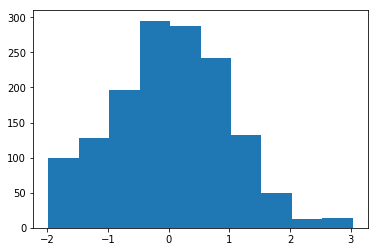

In [11]:
plt.hist(y)

In [12]:
pca.explained_variance_

array([5.32395547e+03, 1.41573304e+03, 1.23386064e+03, 3.95234077e+01,
       1.91322083e+01, 1.17272926e+01, 1.59021845e+00, 8.78579364e-01,
       4.37591352e-01, 2.90252628e-01, 1.97709654e-01, 1.45489424e-01,
       1.89169524e-02, 1.04571293e-02, 5.79059163e-03, 4.10345677e-03,
       2.80194497e-03, 1.07427451e-03])

In [13]:
metric = "neg_mean_absolute_error"

kernel_ridge_parameter_ranges = [{'kernel': ['rbf'], "alpha":[1e-1,1e-2], 'gamma': [1e-1, 1e-2,1e-3,1e-4]},
                    {'kernel': ['polynomial'], 'degree': [2, 3], "alpha":[1e-1, 1e-2]}]

svr_parameter_ranges = [{'kernel': ['rbf'], "C":[1e-1,1e-2]}]

tree_parameter_ranges = [{"n_estimators":[50,100], "subsample":[0.5,1], "max_depth":[3,5,10]}]

dnn_parameter_ranges = [{"hidden_layer_sizes":[(1000,1000),(200, 200, 200),(100, 50, 25),(200, 100, 50, 25)], "nesterovs_momentum":[True, False]}]

# gp_parameter_ranges = [{'kernel': ['rbf'], "alpha":[1e-1,1e-2], 'gamma': [1e-1, 1e-2,1e-3,1e-4]},
#                     {'kernel': ['polynomial'], 'degree': [2, 3], "alpha":[1e-1, 1e-2]}]

In [14]:
kernel_clf = model_selection.GridSearchCV(kernel_ridge.KernelRidge(), kernel_ridge_parameter_ranges, cv=5,
                       scoring=metric)
kernel_clf.fit(X, y)

/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.22951e-17): result may not be accurate.
  overwrite_a=False)
/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=5.36639e-17): result may not be accurate.
  overwrite_a=False)
/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=7.93952e-17): result may not be accurate.
  overwrite_a=False)
/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.09566e-17): result may not be accurate.
  overwrite_a=False)
/Users/jeffchenchengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=5.03892e-17): result may not be accurate.
 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'alpha': [0.1, 0.01], 'gamma': [0.1, 0.01, 0.001, 0.0001]}, {'kernel': ['polynomial'], 'degree': [2, 3], 'alpha': [0.1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [15]:
svr_clf = model_selection.GridSearchCV(svm.SVR(gamma="auto"), svr_parameter_ranges, cv=3,
                       scoring=metric)
svr_clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'C': [0.1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [16]:
tree_clf = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(), tree_parameter_ranges, cv=3,
                       scoring=metric)
tree_clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100], 'subsample': [0.5, 1], 'max_depth': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [17]:
dnn_clf = model_selection.GridSearchCV(neural_network.MLPRegressor(early_stopping=True), dnn_parameter_ranges, cv=3,
                       scoring=metric)
dnn_clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'hidden_layer_sizes': [(1000, 1000), (200, 200, 200), (100, 50, 25), (200, 100, 50, 25)], 'nesterovs_momentum': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [19]:
# gp_clf = model_selection.GridSearchCV(gaussian_process.GaussianProcessRegressor(), gp_parameter_ranges, cv=3,
#                        scoring=metric)
# gp_clf.fit(X, y)

In [20]:
def print_scores(model, name, sj_indices=(raw_feature_df.city == "sj")):
    print("all MAE {}: {}".format(name, mean_absolute_error(y, pwr.inverse_transform(model.best_estimator_.predict(X)[:,None]))))
    print("SJ MAE {}: {}".format(name, mean_absolute_error(y[sj_indices], pwr.inverse_transform(model.best_estimator_.predict(X[sj_indices])[:,None]))))
    print("IQ MAE {}: {}".format(name, mean_absolute_error(y[~sj_indices], pwr.inverse_transform(model.best_estimator_.predict(X[~sj_indices])[:,None]))))

print_scores(kernel_clf, name="kernel")
print()
print_scores(svr_clf, name="svr")
print()
print_scores(tree_clf, name="tree")
print()
print_scores(dnn_clf, name="dnn")

# print("kernel regression MAE:",mean_absolute_error(y, kernel_clf.best_estimator_.predict(X)))
# print("svr MAE:", mean_absolute_error(y,svr_clf.best_estimator_.predict(X)))
# print("tree MAE:", mean_absolute_error(y,tree_clf.best_estimator_.predict(X)))
# print("dnn MAE:", mean_absolute_error(y,dnn_clf.best_estimator_.predict(X)))
# print()
# print("SJ kernel regression MAE:",mean_absolute_error(y[raw_feature_df.city == "sj"], kernel_clf.best_estimator_.predict(X[raw_feature_df.city == "sj"])))
# print("SJ svr MAE:", mean_absolute_error(y[raw_feature_df.city == "sj"], svr_clf.best_estimator_.predict(X[raw_feature_df.city == "sj"])))
# print("SJ tree MAE:", mean_absolute_error(y[raw_feature_df.city == "sj"],tree_clf.best_estimator_.predict(X[raw_feature_df.city == "sj"])))
# print("SJ dnn MAE:", mean_absolute_error(y[raw_feature_df.city == "sj"],dnn_clf.best_estimator_.predict(X[raw_feature_df.city == "sj"])))
# print()
# print("IQ kernel regression MAE:",mean_absolute_error(y[raw_feature_df.city != "sj"], kernel_clf.best_estimator_.predict(X[raw_feature_df.city != "sj"])))
# print("IQ svr MAE:", mean_absolute_error(y[raw_feature_df.city != "sj"],svr_clf.best_estimator_.predict(X[raw_feature_df.city != "sj"])))
# print("IQ tree MAE:", mean_absolute_error(y[raw_feature_df.city != "sj"],tree_clf.best_estimator_.predict(X[raw_feature_df.city != "sj"])))
# print("IQ dnn MAE:", mean_absolute_error(y[raw_feature_df.city != "sj"],dnn_clf.best_estimator_.predict(X[raw_feature_df.city != "sj"])))

all MAE kernel: 14.605643240032522
SJ MAE kernel: 19.620462951013796
IQ MAE kernel: 5.578967760266505

all MAE svr: 11.615732885502988
SJ MAE svr: 11.287983621090111
IQ MAE svr: 12.20568156144617

all MAE tree: 14.971411114808333
SJ MAE tree: 19.951471164998555
IQ MAE tree: 6.007303024465942

all MAE dnn: 18.355698388979864
SJ MAE dnn: 24.75831836348866
IQ MAE dnn: 6.830982434864037
